In [2]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 11.1 MB/s eta 0:00:00


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/home/ibrar/Downloads/Microsoft Stock Price prediction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

from math import floor,ceil,sqrt
import sys
import warnings
import datetime as dt

if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.linear_model import LinearRegression
from pmdarima.arima import auto_arima
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [4]:
!gdown 1-RirY3ludTVrSyonJSJVCt8cMKKhO_DJ

Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1-RirY3ludTVrSyonJSJVCt8cMKKhO_DJ

but Gdown can't. Please check connections and permissions.


In [6]:
df = pd.read_csv('MSFT.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.060337,58435200
6,1986-03-21,0.095486,0.097222,0.091146,0.092882,0.058692,59990400
7,1986-03-24,0.092882,0.092882,0.089410,0.090278,0.057046,65289600
8,1986-03-25,0.090278,0.092014,0.089410,0.092014,0.058143,32083200
9,1986-03-26,0.092014,0.095486,0.091146,0.094618,0.059788,22752000


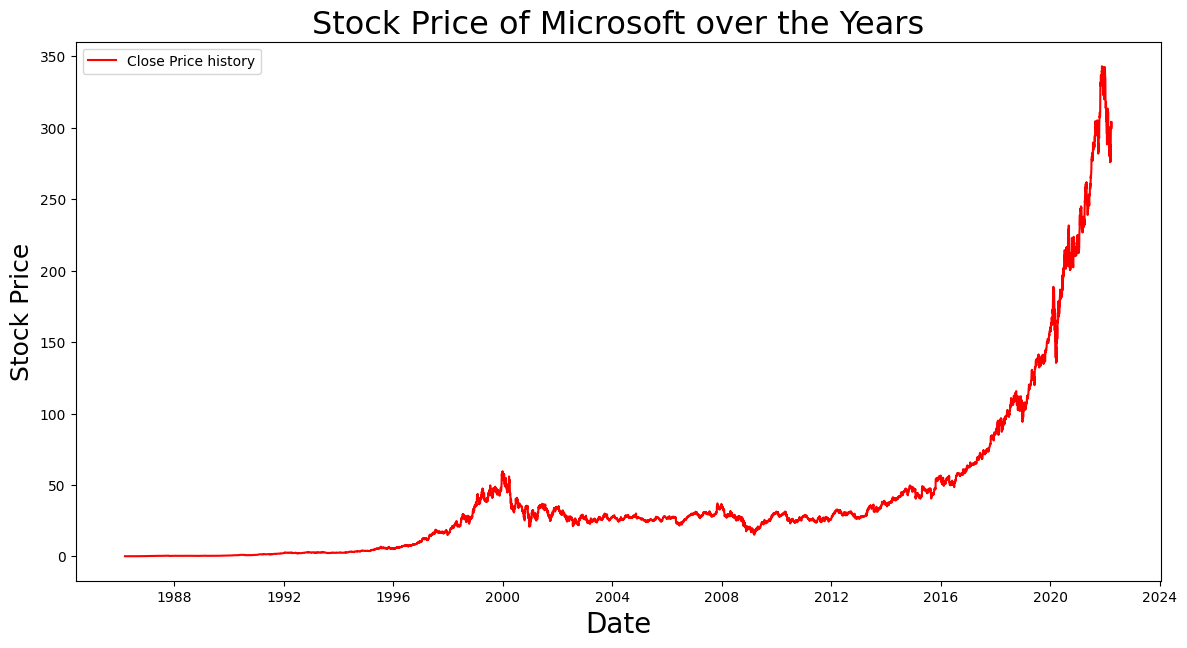

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Close Price history', color='r')
plt.xlabel('Date', size=20)
plt.ylabel('Stock Price', size=18)
plt.title('Stock Price of Microsoft over the Years', size=23)
plt.legend()
plt.show()

In [11]:
def Moving_Average_Prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train__data_set=df_new.iloc[:ceil(shape*0.75)]
    valid__data_set=df_new.iloc[ceil(shape*0.75):]
    print("***** Microsoft Stock Price Prediction Using Moving Averages*********")
    print('Shape of Training Data Set of Microsft Stock Prices',train__data_set.shape)
    print('Shape of Validating Data Set of Microsft Stock Prices',valid__data_set.shape)
    preds = []
    for i in range(0,valid__data_set.shape[0]):
        a = train__data_set['Close'][len(train__data_set)-valid__data_set.shape[0]+i:].sum() + sum(preds)
        b = a/(valid__data_set.shape[0])
        preds.append(b)
    RMS=np.sqrt(np.mean(np.power((np.array(valid__data_set['Close'])-preds),2)))
    print('(Root Mean Square Error) RMSE value on validation set:',RMS)
    valid__data_set['Predictions'] = preds
    plt.plot(train__data_set['Close'])
    plt.plot(valid__data_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=18)
    plt.ylabel('Stock Price',size=18)
    plt.title('Stock Price Prediction by Moving Averages',size=18)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

***** Microsoft Stock Price Prediction Using Moving Averages*********
Shape of Training Data Set of Microsft Stock Prices (6813, 1)
Shape of Validating Data Set of Microsft Stock Prices (2270, 1)
(Root Mean Square Error) RMSE value on validation set: 119.31647492604077


/tmp/ipython-input-3251582984.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid__data_set['Predictions'] = preds


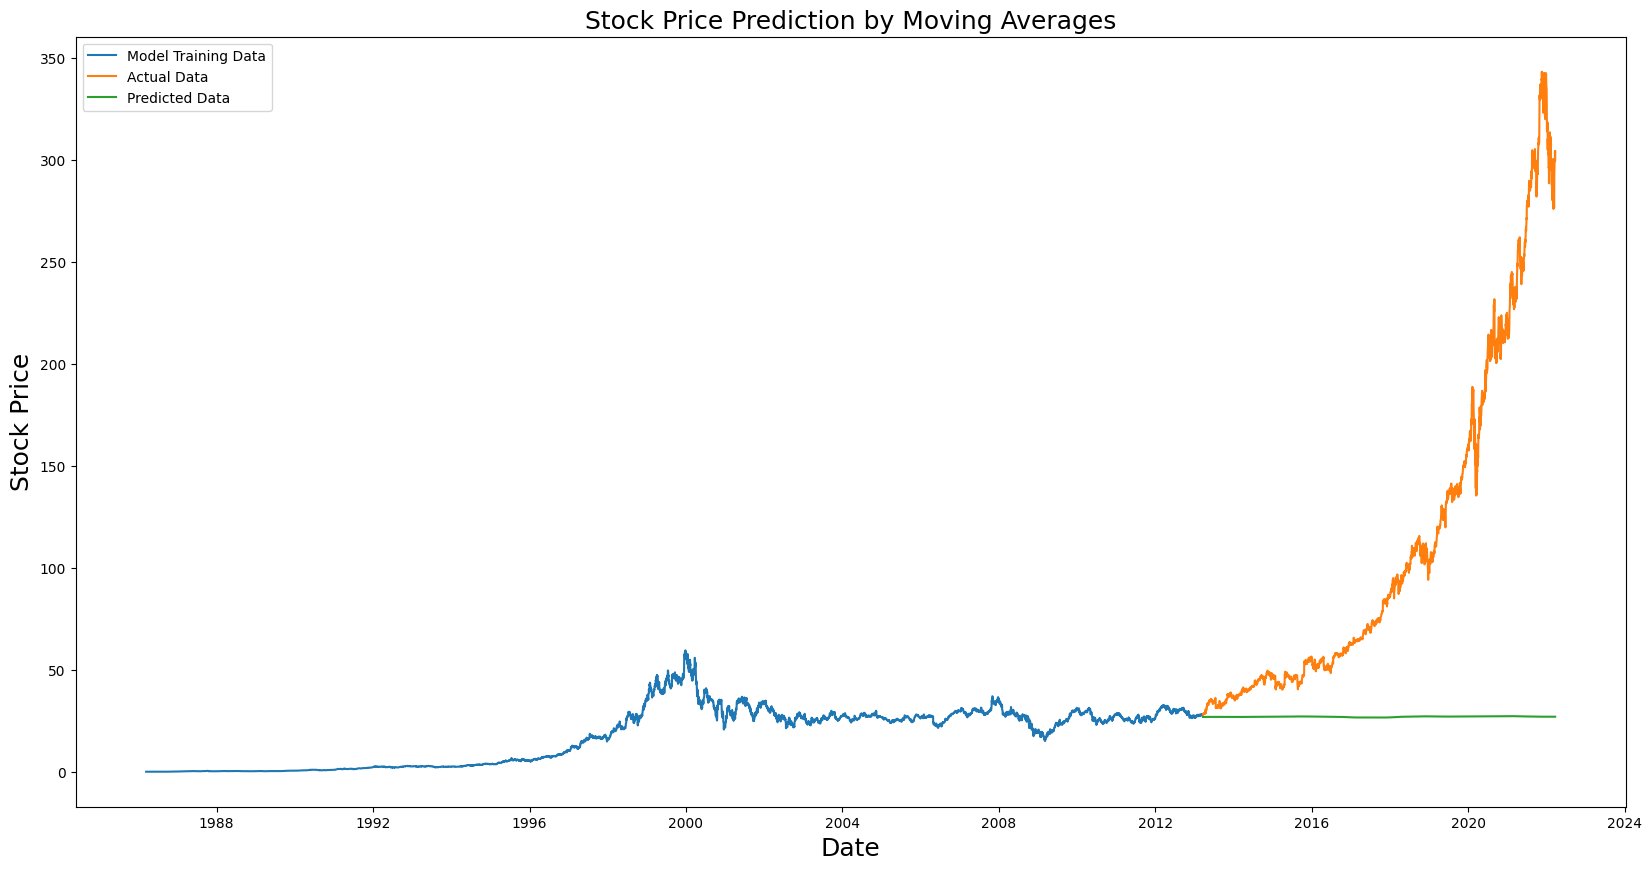

In [12]:
Moving_Average_Prediction(df)

In [14]:
def Linear_Regression_Prediction(df):
    Shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_data_set=df_new.iloc[:ceil(Shape*0.75)]
    valid_data_set=df_new.iloc[ceil(Shape*0.75):]
    print("**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******")
    print('Shape of Training dataset Set',train_data_set.shape)
    print('Shape of Validation dataset Set',valid_data_set.shape)
    train=train_data_set.reset_index()
    valid=valid_data_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    #implement linear regression
    Model = LinearRegression()
    Model.fit(np.array(x_train).reshape(-1,1),y_train)
    preds = Model.predict(np.array(x_valid).reshape(-1,1))
    RMS=np.sqrt(np.mean(np.power((np.array(valid_data_set['Close'])-preds),2)))
    print('(Root Mean Square Error)RMSE value on validation set:',RMS)
    valid_data_set['Predictions'] = preds
    plt.plot(train_data_set['Close'])
    plt.plot(valid_data_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=18)
    plt.ylabel('Microsoft Stock Price',size=18)
    plt.title('Microsoft Stock Price Prediction by Linear Regression',size=18)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)
(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds
/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902
**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (6813, 1)
Shape of Validation dataset Set (2270, 1)


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


(Root Mean Square Error)RMSE value on validation set: 108.83033849436902


/tmp/ipython-input-1918439172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


RecursionError: maximum recursion depth exceeded

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


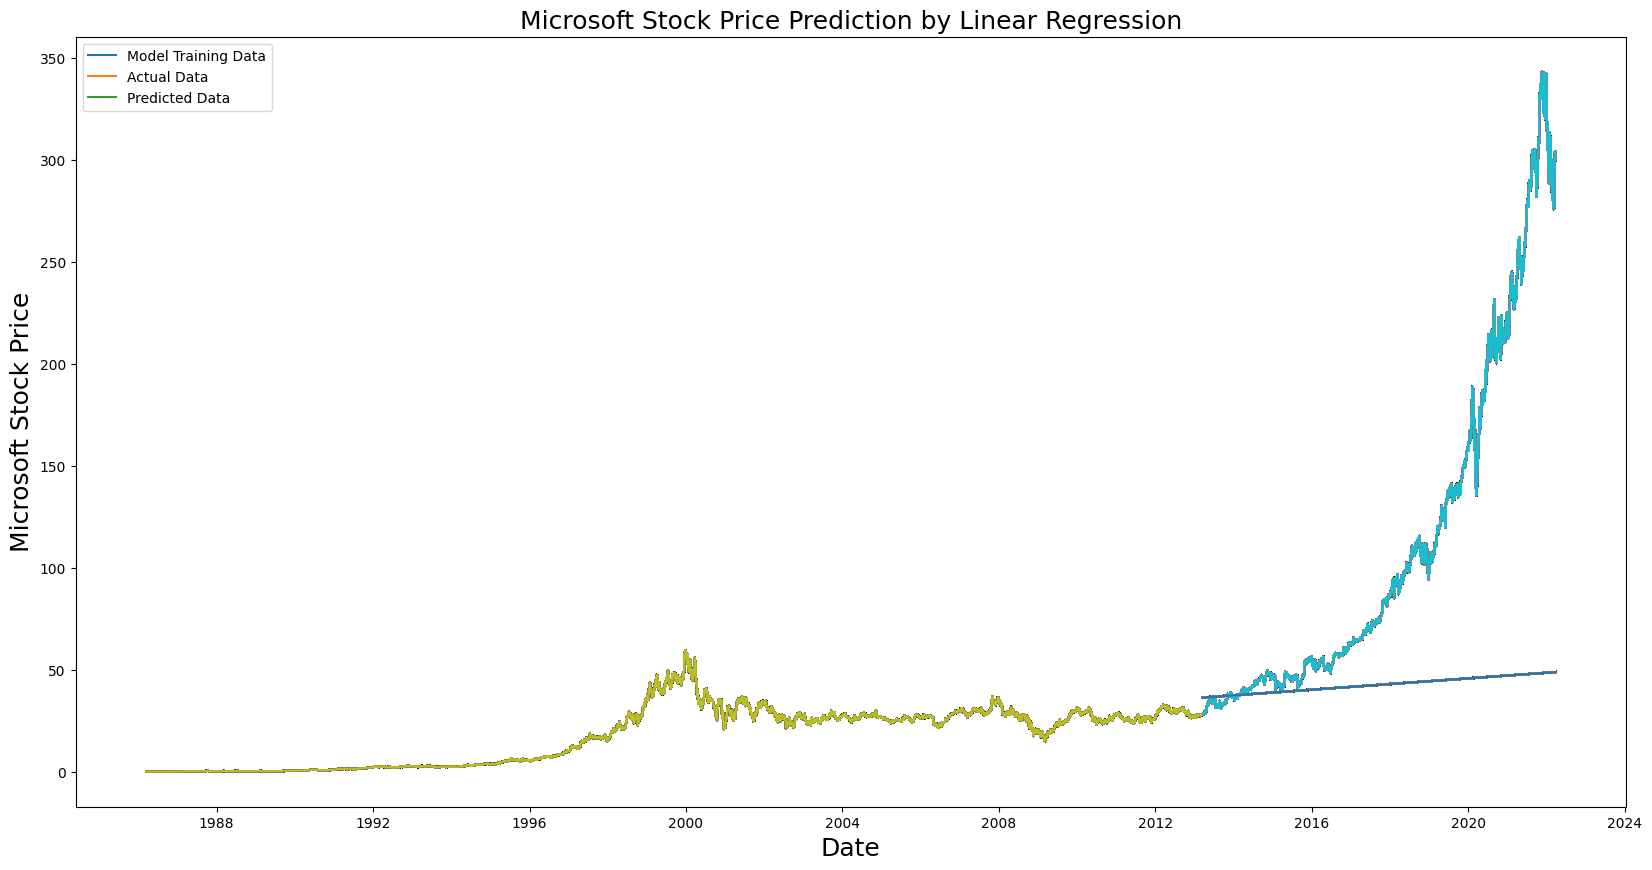

In [15]:
    Linear_Regression_Prediction(df)

In [16]:
def K_Nearest_Neighbours_Predict(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_data_set=df_new.iloc[:ceil(shape*0.75)]
    valid_data_set=df_new.iloc[ceil(shape*0.75):]
    print("*********Microsoft STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS*********")
    print('Shape of Training Data Set',train_data_set.shape)
    print('Shape of Validation Data Set',valid_data_set.shape)
    train=train_data_set.reset_index()
    valid=valid_data_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    x_train_scaled = scaler.fit_transform(np.array(x_train).reshape(-1, 1))
    x_train = pd.DataFrame(x_train_scaled)
    x_valid_scaled = scaler.fit_transform(np.array(x_valid).reshape(-1, 1))
    x_valid = pd.DataFrame(x_valid_scaled)
    params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
    knn = neighbors.KNeighborsRegressor()
    model = GridSearchCV(knn, params, cv=5)
    model.fit(x_train,y_train)
    preds = model.predict(x_valid)
    RMS=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
    print('(Root Mean Square Error) RMSE value on validation set:',RMS)
    valid_data_set['Predictions'] = preds
    plt.plot(train_data_set['Close'])
    plt.plot(valid_data_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=18)
    plt.ylabel('Microsft Stock Price',size=18)
    plt.title('Microsoft Stock Price Prediction by K-Nearest Neighbors',size=18)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

*********Microsoft STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS*********
Shape of Training Data Set (6813, 1)
Shape of Validation Data Set (2270, 1)
(Root Mean Square Error) RMSE value on validation set: 121.5471034179944


/tmp/ipython-input-236277686.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


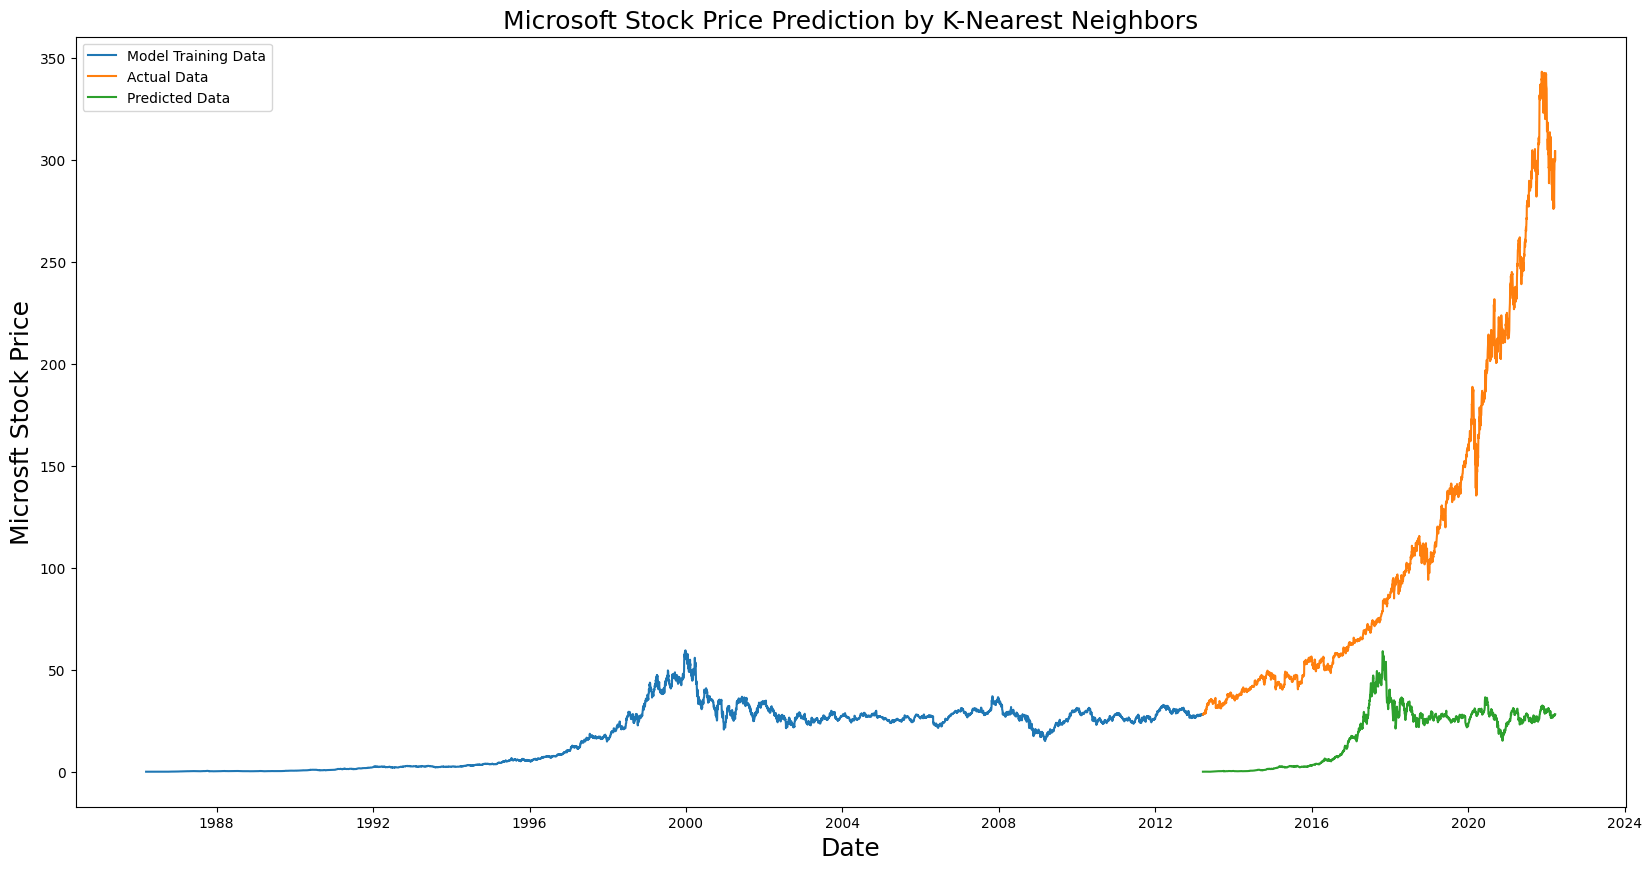

In [18]:
K_Nearest_Neighbours_Predict(df)

In [21]:
def LSTM_Prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    dataset = df_new.values
    train=df_new[:ceil(shape*0.75)]
    valid=df_new[ceil(shape*0.75):]
    print("******** Microsoft STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM) *******")
    print('Shape of Training data Set',train.shape)
    print('Shape of Validation data Set',valid.shape)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    X_train, Y_train = [], []
    for i in range(40,len(train)):
        X_train.append(scaled_data[i-40:i,0])
        Y_train.append(scaled_data[i,0])
    X_train, Y_train = np.array(X_train), np.array(Y_train)
    Y_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    Model = Sequential()
    Model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
    Model.add(LSTM(units=50))
    Model.add(Dense(1))
    Model.compile(loss='mean_squared_error', optimizer='adam')
    Model.fit(X_train, Y_train, epochs=1, batch_size=1, verbose=2)
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(40,inputs.shape[0]):
        X_test.append(inputs[i-40:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = Model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    RMS=np.sqrt(np.mean(np.power((valid-closing_price),2)))
    print('(Root Neab Square Error) RMSE value on validation set:',RMS)
    valid['Predictions'] = closing_price
    plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Microsoft Stock Price Prediction by Long Short Term Memory (LSTM)',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

******** Microsoft STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM) *******
Shape of Training data Set (6813, 1)
Shape of Validation data Set (2270, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6773/6773 - 124s - 18ms/step - loss: 4.4628e-05
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
(Root Neab Square Error) RMSE value on validation set: 80.8793035472959


/tmp/ipython-input-3710440532.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


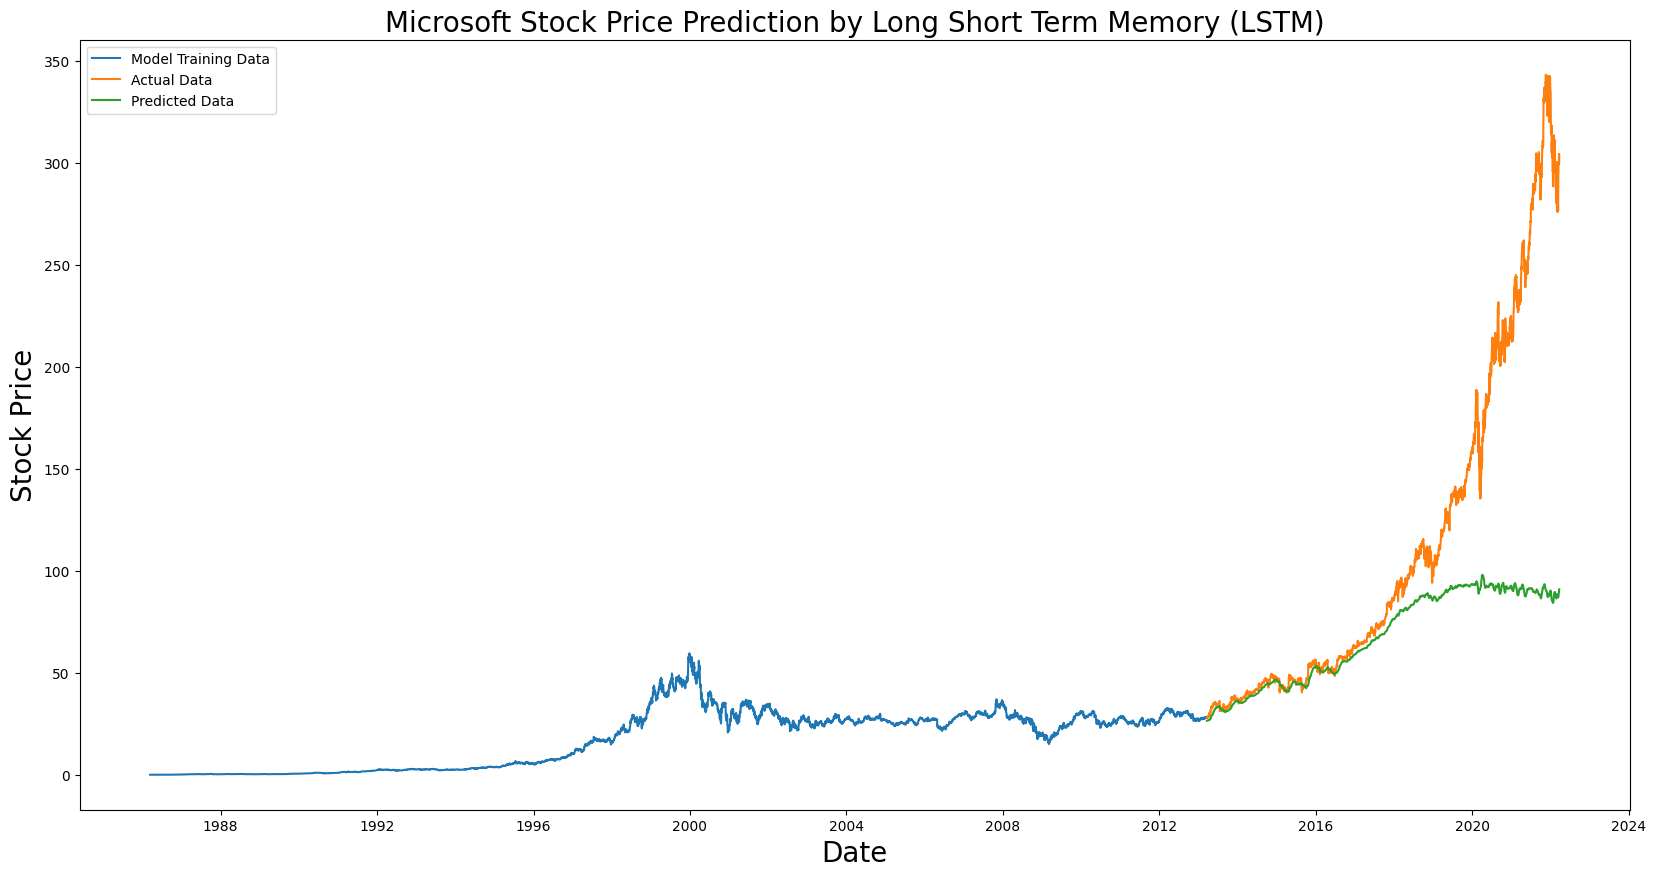

In [22]:
LSTM_Prediction(df)